In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
# Function to calculate regression line (slope and intercept)
def linRegression(x, y):
    """
    Calculate the slope and intercept of the regression line using the least squares method.
    Also returns the Mean Squared Error
    
    Parameters:
        x (array-like): Independent variable values.
        y (array-like): Dependent variable values.
        
    Returns:
        slope (float): Slope of the regression line.
        intercept (float): Intercept of the regression line.
    """
    mean_x, mean_y = np.mean(x), np.mean(y)
    
    # Calculate slope (m)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sum((x - mean_x) ** 2)
    slope = numerator / denominator
    
    # Calculate intercept (b)
    intercept = mean_y - slope * mean_x
    
    # Predicted values and Mean Squared Error (MSE)
    y_pred = intercept + slope * x
    mse = np.mean((y - y_pred)**2)
    
    return y_pred, slope, intercept, mse

In [141]:
ice_cream_data = {
    'Sales': [41, 23, 29, 76, 113, 79, 67, 52, 91, 58],
    'Temp': [20, 15, 13, 28, 31, 22, 26, 27, 34, 16]
}

ice_cream_df = pd.DataFrame(ice_cream_data)
ice_cream_df

,Sales,Temp
0,41,20
1,23,15
2,29,13
3,76,28
4,113,31
5,79,22
6,67,26
7,52,27
8,91,34
9,58,16


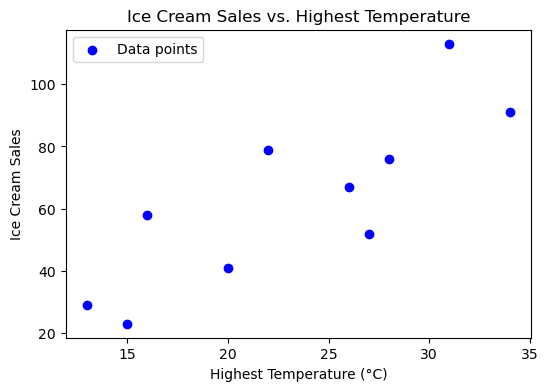

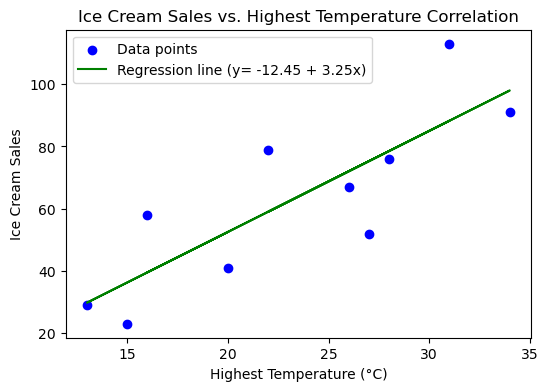

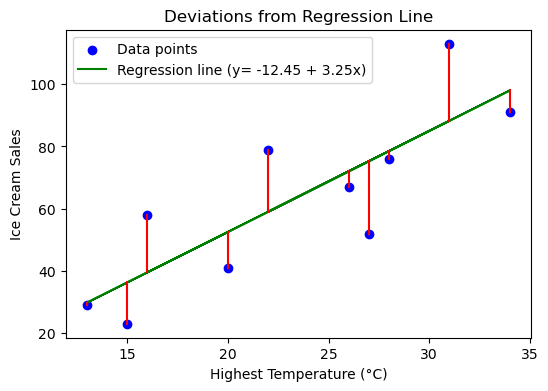

Mean Squared Error is: 228.40
Variance of the Dependent Variable is: 711.09


In [142]:
x = ice_cream_df['Temp']
y = ice_cream_df['Sales']

# Calculate variance
variance = np.mean((y - np.mean(y))**2)
# Calculate the regression line
y_pred, slope, intercept, mse = linRegression(x, y)

# Plot the data
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('Highest Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Ice Cream Sales vs. Highest Temperature')
plt.legend()
plt.show()

# Plot the data and a regression line
ax.plot(x, y_pred, color='green', label=f'Regression line (y= {intercept:.2f} + {slope:.2f}x)')
ax.set_title('Ice Cream Sales vs. Highest Temperature Correlation')
ax.legend()
display(fig)

# Show lines for deviations from the regresion line
for i in range(len(x)):
    ax.plot([x[i], x[i]], [y[i], y_pred[i]], color='red')  # Vertical lines for deviations
ax.set_title('Deviations from Regression Line')
ax.legend()
display(fig)

print(f"Mean Squared Error is: {mse:.2f}")
print(f"Variance of the Dependent Variable is: {variance:.2f}")

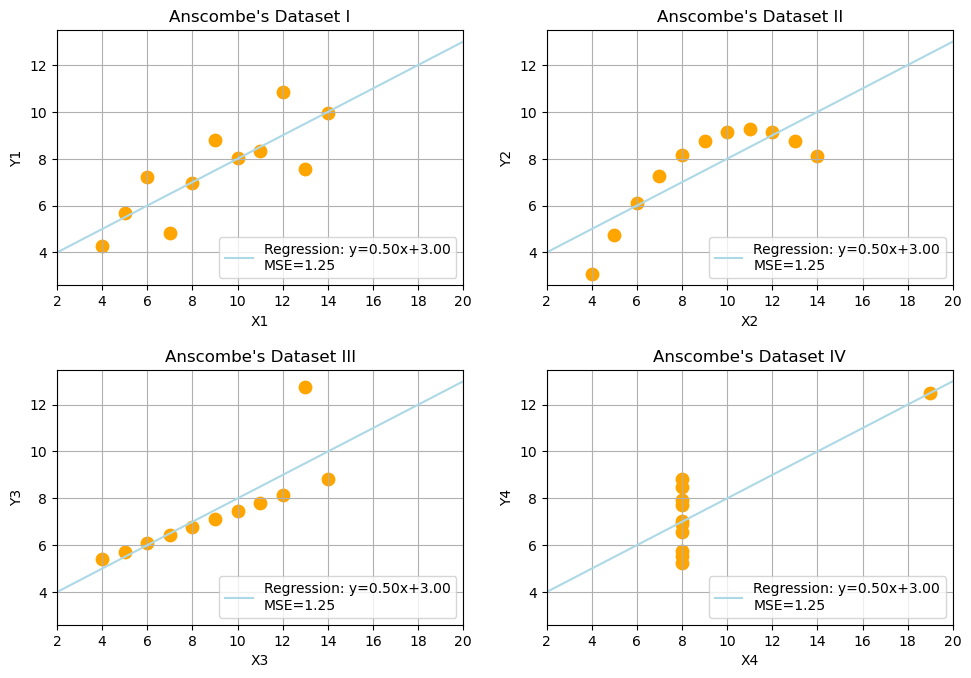

In [143]:
# Anscombe's quartet
anscombes = {
    "I": {
        'x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
    },
    "II": {
        'x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
    },
    "III": {
        'x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
    },
    "IV": {
        'x': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
        'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
    }
}

fig, ax = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
ax = ax.flatten()

# Plot all datasets
for i, (key, data) in enumerate(anscombes.items()):
    df = pd.DataFrame(data)
    x = np.array(df['x'])
    y = np.array(df['y'])
    
    # Scatter plot
    ax[i].scatter(x, y, color='orange', s=80)
    
    # Calculate regression line
    _, slope, intercept, mse = linRegression(x, y)

    ax[i].set_xlim(2, 20) 
    x_min, x_max = ax[i].get_xlim()
    y_min = slope * x_min + intercept
    y_max = slope * x_max + intercept
    
    # Plot regression line
    ax[i].plot([x_min, x_max], [y_min, y_max], color='lightblue', label=f'Regression: y={slope:.2f}x+{intercept:.2f}\nMSE={mse:.2f}')

    # Formatting
    ax[i].set_title(f"Anscombe's Dataset {key}")
    ax[i].set_xlabel(f"X{i+1}")
    ax[i].set_ylabel(f"Y{i+1}")
    ax[i].legend(loc="lower right")
    ax[i].grid(True)

    # Force tick labels
    ax[i].tick_params(axis='x', which='both', labelbottom=True)
    ax[i].tick_params(axis='y', which='both', labelleft=True)

# Adjust layout and display
plt.tight_layout(pad=1.5)
plt.show()

In [479]:
def phi(x):
    """
    Prepares the design matrix for linear regression.
    
    Parameters:
    x (array-like): Input data values.
    
    Returns:
    numpy.ndarray: A 2D array with a column of ones (to represent the intercept term) 
                   and the input data values.
    """
    return np.vstack([np.ones_like(x), x])


def cost(y_pred, training_data):
    """ Computes the mean squared error (MSE). """
    return np.mean((y_pred - training_data[1]) ** 2)


def gradientCost(y_pred, training_data):
    """ Computes the gradient of the cost function. """
    x, y = training_data
    return np.dot(phi(x), (y_pred - y)) / len(x)


def gradientDescent(F, gradientF, training_data, w, eta, epochs, clipvalue=None, clipnorm=None, results=False):
    """
    Optimizes weights using gradient descent.
    
    Parameters:
    F (function): Function to minimize.
    gradientF (function): Gradient of the function.
    training_data (tuple): A tuple (x, y), where:
        - x (array-like): Input data values.
        - y (array-like): Output data values.
    w (array-like): Initial weights.
    eta (float): Learning rate.
    epochs (int): Number of iterations.
    clipvalue (float): The threshold for clipping individual gradient values.
    clipnorm (float): The threshold for clipping the L2 norm of the gradient.
    
    Returns:
    numpy.ndarray: Optimized weights.
    """
    # Ensure that both clipping methods can't be used simultaneously
    if clipvalue is not None and clipnorm is not None:
        raise ValueError("You can only use one of 'clipvalue' or 'clipnorm'. Do not use both.")
    
    x, y = training_data
    for i in range(epochs):
        y_pred = np.dot(w, phi(x))  # Predicted values
        value = F(y_pred, training_data)  # Cost value
        gradient = gradientF(y_pred, training_data)  # Gradient

        # Gradient clipping
        if clipnorm is not None:
            # Clip the gradient based on the L2 norm
            norm = np.linalg.norm(gradient)
            if norm > clipnorm:
                gradient = gradient * (clipnorm / norm)
        elif clipvalue is not None:
            # Clip the gradient based on the individual value threshold
            gradient = np.clip(gradient, -clipvalue, clipvalue)
        
        w = w - eta * gradient  # Update weights
        
        # Print results
        if results:
            print(f"epoch {i+1}: w = {w}, F(w) = {value}, ∇F = {gradient}")
    return w


def linRegressGD(training_data, eta, epochs, clipvalue=None, clipnorm=None, results=False):
    """
    Performs linear regression using gradient descent.
    
    Parameters:
    training_data (tuple): A tuple (x, y), where:
        - x (array-like): Input data values.
        - y (array-like): Output data values.
    eta (float): Learning rate.
    epochs (int): Number of iterations.
    
    Returns:
    y_pred (numpy.ndarray): Predicted output values.
    optimized_weights (numpy.ndarray): Optimized weights.
    """
    x, y = training_data
    
    initial_weights = np.array([0, 0])  
    optimized_weights = gradientDescent(cost, gradientCost, (x, y), initial_weights, eta, epochs, clipvalue, clipnorm, results)
    y_pred = optimized_weights.dot(phi(x))
    return y_pred, optimized_weights

In [145]:
trainExamples = {
    "x": [1,2,4],
    "y": [1,3,3]
}

test_df = pd.DataFrame(trainExamples)
test_df

,x,y
0,1,1
1,2,3
2,4,3


epoch 1: w = [0.46666667 1.26666667], F(w) = 6.333333333333333, ∇F = [-2.33333333 -6.33333333]
epoch 2: w = [0.24888889 0.54222222], F(w) = 2.3185185185185184, ∇F = [1.08888889 3.62222222]
epoch 3: w = [0.41274074 0.93362963], F(w) = 1.0534650205761318, ∇F = [-0.81925926 -1.95703704]
epoch 4: w = [0.36116543 0.70060247], F(w) = 0.6515254138088706, ∇F = [0.25787654 1.1651358 ]
epoch 5: w = [0.42865119 0.81788181], F(w) = 0.5207664184524718, ∇F = [-0.33742881 -0.58639671]
epoch 6: w = [0.42790944 0.73947672], F(w) = 0.47544933446504895, ∇F = [0.00370875 0.39202546]
epoch 7: w = [0.46390509 0.77118491], F(w) = 0.45727370676331525, ∇F = [-0.17997821 -0.15854093]
epoch 8: w = [0.47790445 0.74170366], F(w) = 0.44792263345796063, ∇F = [-0.0699968   0.14740621]
epoch 9: w = [0.50286185 0.74696313], F(w) = 0.4416253441726497, ∇F = [-0.124787   -0.02629731]
epoch 10: w = [0.52037335 0.73321255], F(w) = 0.43654906998929216, ∇F = [-0.08755753  0.06875286]
epoch 11: w = [0.54079949 0.73054075], F(w

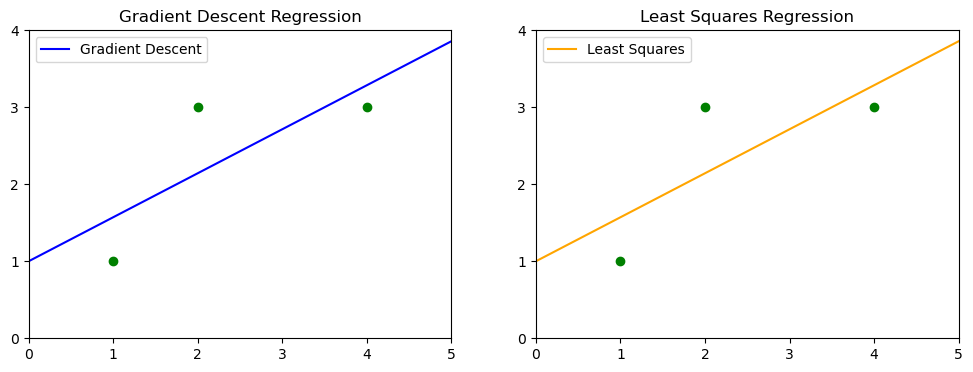

 Intercept: 0.9999999999999998, Slope: 0.5714285714285715, MSE: 0.3809523809523809


In [353]:
x = test_df['x'].to_numpy()
y = test_df['y'].to_numpy()

y_estimate, weights = linRegressGD((x,y), 0.2, 300, results=True)
y_pred, slope, intercept, mse = linRegression(x, y)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for ax in axs:
    ax.scatter(x, y, color="green")
    ax.set_xlim(0, max(x)+1)
    ax.set_ylim(0, max(y)+1)
    ax.set_xticks(range(0, max(x)+2, 1))
    ax.set_yticks(range(0, max(y)+2, 1))
    x_min, x_max = ax.get_xlim()
    
y_min = weights.dot(phi(np.array([x_min])))  # Calculate y_min
y_max = weights.dot(phi(np.array([x_max])))  # Calculate y_max
axs[0].plot([x_min, x_max], [y_min, y_max], label="Gradient Descent", color="blue")
axs[0].set_title("Gradient Descent Regression")
axs[0].legend()


y_min = slope * x_min + intercept
y_max = slope * x_max + intercept
axs[1].plot([x_min, x_max], [y_min, y_max], label="Least Squares", color="orange")
axs[1].set_title("Least Squares Regression")
axs[1].legend()

plt.show()

print(f" Intercept: {intercept}, Slope: {slope}, MSE: {mse}")

In [147]:
"""housing_data = {
    "Size(m2)": [45, 55, 60, 72, 85, 90, 95, 100, 107, 110, 115, 125, 130, 135, 145, 
                155, 160, 165, 175, 185, 190, 200, 215, 225, 230, 240, 250, 265, 
                270, 280, 290, 300, 310, 320, 330, 340, 350, 360],
    "Price(€)": [115000, 130000, 125000, 180000, 185000, 200000, 192500, 210000, 
                    245000, 235000, 250000, 265000, 275000, 290000, 330000, 315000, 
                    340000, 350000, 400000, 410000, 420000, 450000, 500000, 520000, 
                    535000, 550000, 590000, 620000, 640000, 650000, 670000, 700000, 
                    710000, 740000, 750000, 780000, 800000, 850000]
}"""


house_df = pd.read_csv('housing_prices.csv', sep=';')
house_df.head(5)
# Size ($1000)  Price (Square Feet)

,Size,Price
0,848,179
1,998,169
2,1098,249
3,1199,299
4,1236,201


Epoch_value: 5, Learning_rate: 0.0005
epoch 1: w = [2.22715831e-07 4.99999950e-04], F(w) = 129981.89361702128, ∇F = [-4.45431662e-04 -9.99999901e-01]
epoch 2: w = [4.45450660e-07 9.99999901e-04], F(w) = 129222.65766815962, ∇F = [-4.45469659e-04 -9.99999901e-01]
epoch 3: w = [6.68204605e-07 1.49999985e-03], F(w) = 128465.73137669868, ∇F = [-4.45507889e-04 -9.99999901e-01]
epoch 4: w = [8.90977781e-07 1.99999980e-03], F(w) = 127711.11474263837, ∇F = [-4.45546353e-04 -9.99999901e-01]
epoch 5: w = [1.11377031e-06 2.49999975e-03], F(w) = 126958.80776597875, ∇F = [-4.45585053e-04 -9.99999901e-01]

Epoch_value: 10, Learning_rate: 0.0005
epoch 1: w = [2.22715831e-07 4.99999950e-04], F(w) = 129981.89361702128, ∇F = [-4.45431662e-04 -9.99999901e-01]
epoch 2: w = [4.45450660e-07 9.99999901e-04], F(w) = 129222.65766815962, ∇F = [-4.45469659e-04 -9.99999901e-01]
epoch 3: w = [6.68204605e-07 1.49999985e-03], F(w) = 128465.73137669868, ∇F = [-4.45507889e-04 -9.99999901e-01]
epoch 4: w = [8.90977781e-

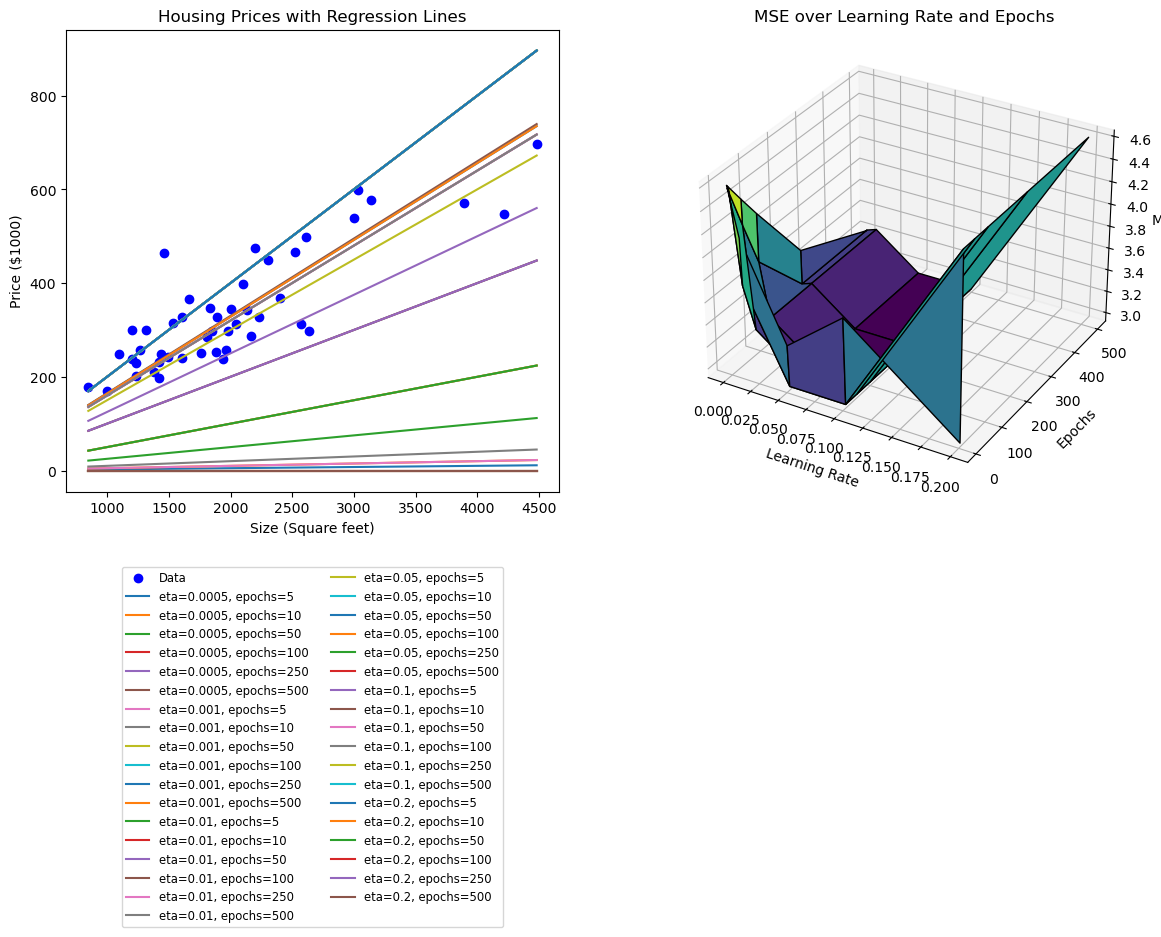

In [501]:
from mpl_toolkits.mplot3d import Axes3D

size = house_df["Size"].to_numpy()
price = house_df["Price"].to_numpy()
training_data = (size, price)

learning_rates = [0.0005, 0.001, 0.01, 0.05, 0.1, 0.2]
epoch_list = [5, 10, 50, 100, 250, 500]

# Create subplots
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121) # 1-row 2-column 1-index (from left)
ax2 = fig.add_subplot(122, projection='3d')

# Scatter plot for housing data
ax1.scatter(size, price, color='blue', label='Data')
ax1.set_title('Housing Prices with Regression Lines')
ax1.set_xlabel('Size (Square feet)')
ax1.set_ylabel('Price ($1000)')

# Arrays to hold values for 3D plot
mse_vals = [] # Mean Squared Error
lr_vals = [] # Learning rate
epoch_vals = []

# Perform gradient descent for each combination of learning rate and epoch
for eta in learning_rates:
    for epochs in epoch_list:
        print(f"Epoch_value: {epochs}, Learning_rate: {eta}")
        y_pred, optimized_weights = linRegressGD(training_data, eta, epochs, clipnorm=1, results=True)
        mse = np.mean((y_pred - size) ** 2)
        mse_vals.append(mse)
        lr_vals.append(eta)
        epoch_vals.append(epochs)
        # Plot regression line  (range for size to ensure the line spans the plot)
        size_range = np.linspace(min(size), max(size), 100)
        y_pred_line = optimized_weights[0] + optimized_weights[1] * size_range
        ax1.plot(size_range, y_pred_line, label=f'eta={eta}, epochs={epochs}')
        print(f"")

# Show legend
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize='small')


mse_vals = np.array(mse_vals)
lr_vals = np.array(lr_vals)
epoch_vals = np.array(epoch_vals)

# Reshape mse_values for 3D plot
mse_vals = mse_vals.reshape(len(learning_rates), len(epoch_list))
lr_vals = lr_vals.reshape(len(learning_rates), len(epoch_list))
epoch_vals = epoch_vals.reshape(len(learning_rates), len(epoch_list))


# Plot the 3D surface
ax2.plot_surface(lr_vals, epoch_vals, mse_vals, cmap='viridis', edgecolor="k")
ax2.set_title('MSE over Learning Rate and Epochs')
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel('Epochs')
ax2.set_zlabel('MSE')

plt.show()

epoch 1: w = [4.45431662e-06 9.99999901e-03], F(w) = 129981.89361702128, ∇F = [-4.45431662e-04 -9.99999901e-01]
epoch 2: w = [8.91669964e-06 1.99999980e-02], F(w) = 115236.00954591778, ∇F = [-4.46238303e-04 -9.99999900e-01]
epoch 3: w = [1.33882647e-05 2.99999970e-02], F(w) = 101413.98843507256, ∇F = [-4.47156503e-04 -9.99999900e-01]
epoch 4: w = [1.78703759e-05 3.99999960e-02], F(w) = 88515.83028446347, ∇F = [-4.48211127e-04 -9.99999900e-01]
epoch 5: w = [2.23647261e-05 4.99999950e-02], F(w) = 76541.53509406316, ∇F = [-4.49435017e-04 -9.99999899e-01]
epoch 6: w = [2.68734509e-05 5.99999940e-02], F(w) = 65491.10286383766, ∇F = [-4.50872479e-04 -9.99999898e-01]
epoch 7: w = [3.13992985e-05 6.99999930e-02], F(w) = 55364.533593743894, ∇F = [-4.52584761e-04 -9.99999898e-01]
epoch 8: w = [3.59458886e-05 7.99999919e-02], F(w) = 46161.82728372608, ∇F = [-4.54659006e-04 -9.99999897e-01]
epoch 9: w = [4.05181241e-05 8.99999909e-02], F(w) = 37882.98393371032, ∇F = [-4.57223551e-04 -9.99999895e-0

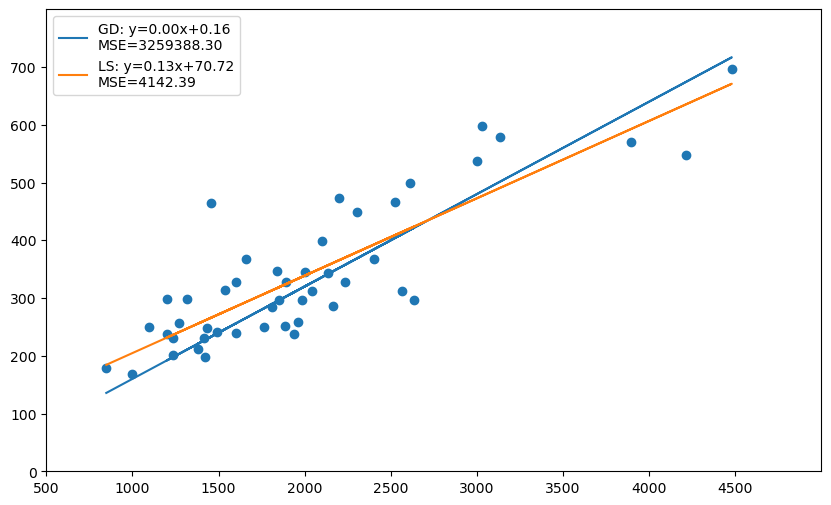

In [531]:
_, ax = plt.subplots(figsize=(10,6))

plt.scatter(house_df["Size"], house_df["Price"])

ax.set_xlim(500, 5000)
ax.set_ylim(0, 800)
ax.set_xticks(range(500, 5000, 500))
ax.set_yticks(range(0, 800, 100))

y_pred, weights = linRegressGD((house_df["Size"], house_df["Price"]), 0.01, 500, clipnorm=1.0, results=True)
mse = np.mean((y_pred - size) ** 2)
plt.plot(house_df["Size"], y_pred, label=f'GD: y={weights[0]:.2f}x+{weights[1]:.2f}\nMSE={mse:.2f}')

y_pred, slope, intercept, mse = linRegression(house_df["Size"], house_df["Price"])
plt.plot(house_df["Size"], y_pred, label=f'LS: y={slope:.2f}x+{intercept:.2f}\nMSE={mse:.2f}')

plt.legend()
plt.show()